In [ ]:
# Last amended: 18th April, 2024
# Refer: https://python.langchain.com/docs/get_started/introduction/
# It is expected that ollama is already installed

Not on colab: This notebook accesses ollama on local machine.    
Colab can not access local machine applications, hence, this notebook works on local machine and not cobal.

# langchain QuickStart

## How is langchain organized
Refer [here](https://blog.langchain.dev/the-new-langchain-architecture-langchain-core-v0-1-langchain-community-and-a-path-to-langchain-v0-1/)

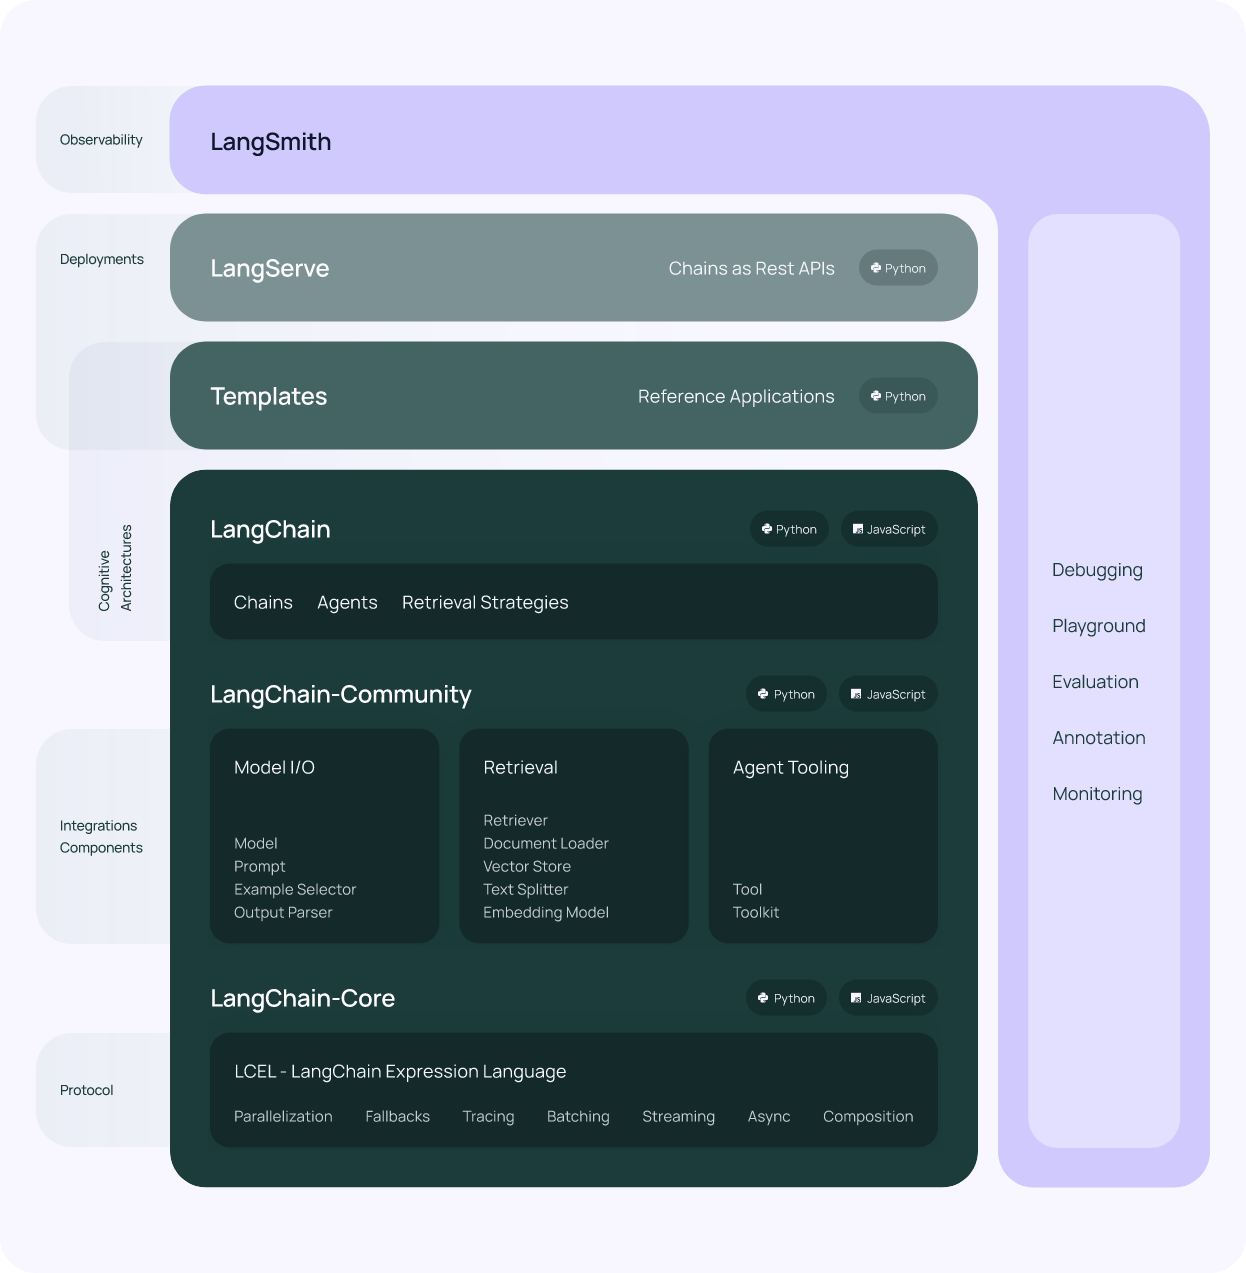

In [ ]:
# langchain modules:
#      langchain:            Original module: core runtime logic + base interfaces chains/retrievers/agents
#      langchain_core :      
#      langchain_community : IIIrd party integrations (code)

In this [quickstart](https://python.langchain.com/docs/get_started/quickstart/) we'll learn how to:

- Get setup with LangChain, LangSmith and LangServe
- Use the most basic and common components of LangChain: prompt templates, models, and output parsers
- Use LangChain Expression Language, the protocol that LangChain is built on and which facilitates component chaining
- Build a simple application with LangChain
- Trace your application with LangSmith
- Serve your application with LangServe

## Installation

In [ ]:
# Execute if langchain not installed:
#! pip install langchain

Make sure the Ollama server is running. After that, you can do:

In [1]:
# Check if ollama is running:

!systemctl status ollama

● ollama.service - Ollama Service
     Loaded: loaded (]8;;file://ashok/etc/systemd/system/ollama.service/etc/systemd/system/ollama.service]8;;; enabled; vendor preset: enabled)
     Active: active (running) since Thu 2024-04-18 15:48:33 IST; 34min ago
   Main PID: 1174 (ollama)
      Tasks: 16 (limit: 38356)
     Memory: 775.4M
        CPU: 7.918s
     CGroup: /system.slice/ollama.service
             └─1174 /usr/local/bin/ollama serve

Apr 18 15:48:33 ashok ollama[1174]: time=2024-04-18T15:48:33.655+05:30 leve…: 0"
Apr 18 15:48:33 ashok ollama[1174]: time=2024-04-18T15:48:33.656+05:30 leve…30)"
Apr 18 15:48:33 ashok ollama[1174]: time=2024-04-18T15:48:33.657+05:30 leve…..."
Apr 18 15:48:36 ashok ollama[1174]: time=2024-04-18T15:48:36.931+05:30 leve…x2]"
Apr 18 15:48:36 ashok ollama[1174]: time=2024-04-18T15:48:36.931+05:30 leve…ype"
Apr 18 15:48:36 ashok ollama[1174]: time=2024-04-18T15:48:36.931+05:30 leve…so*"
Apr 18 15:48:36 ashok ollama[1174]: time=2024-04-18T15:48:36.933+05:

In [ ]:
# Note this does not work as there is way to supply password:

# ! sudo systemctl restart ollama

## Ask ollama question

In [2]:
# 1.0 Initialise and get llm object:

from langchain_community.llms import Ollama
llm = Ollama(model="llama2")
llm

Ollama()

Once you've installed and initialized the LLM of your choice, we can try using it! Let's ask it what LangSmith is - this is something that wasn't present in the training data so it shouldn't have a very good response.

In [3]:
# 1.1 Ask llama2 a question:

output = llm.invoke("how can langsmith help with testing?")
print(output)

Langsmith is a tool that can assist in testing by providing various features and functionalities. Here are some ways Langsmith can help with testing:

1. Automated Testing: Langsmith provides automated testing capabilities, allowing you to write and run tests automatically. This can save time and reduce the likelihood of human error.
2. Test Case Management: Langsmith's test case management feature allows you to create, organize, and run tests in a structured manner. This helps ensure that all necessary tests are executed and provides visibility into testing progress.
3. Test Data Management: Langsmith's test data management feature enables you to manage and maintain test data, including test cases, test scripts, and test results. This helps keep your testing process organized and efficient.
4. Integration Testing: Langsmith supports integration testing by allowing you to integrate multiple testing components into a single testing environment. This makes it easier to test complex syste

We can also guide its response with a prompt template. Prompt templates convert raw user input to better input to the LLM.

## Writing prompts

### What is a system prompt and User messages?
Read [this extensive discussion](https://www.reddit.com/r/LocalLLaMA/comments/19dscer/system_prompts_are_adding_unnecessary_complexity/) on System Prompt on reddit.    
Ref also [here](https://support.netdocuments.com/s/article/System-Message-versus-User-Message)

>While almost all large language models started with the fundamental call-and-response structure of a prompt and completion, that simple structure has evolved over time. Today many models now incorporate two types of messages, which are then combined to form a single prompt. 

>The first type of message is the user message. This is the specific user question or comment that the model responds to. For example, when you interact with generative AI chatbots like ChatGPT, Bard, Claude, or Bing, what you as the user type in is the “user message”.  

>But hidden from your view as a user is another type of message: the system message. The system message determines what role the AI should play and how it should behave generally. When the Bing Chatbot first launched, it famously leaked its own system message, and the revelation demonstrated that system messages can be quite extensive, covering everything from how the model should respond, the tone it should use, when it should redirect the user to another topic, and much more. 

>We can use a few examples to demonstrate how user and system messages work together, and why combining them can be so useful. Let’s start with a user message, without any system message:  

**User Message:**

`What color is the ocean? `

**Completion:**

`The ocean can appear to be many colors, depending on lighting, depth, and the presence of particles or organisms. However, it is most commonly perceived as blue. `

Now, let’s introduce a simple system message and see what happens when we use the same user message:

**System Message:**

`No matter what the user asks, just reply “HODOR”. `

**User Message:**

`What color is the ocean? `

**Completion:**

`HODOR` 

While an admittedly silly example, it shows you the power of system messages. You can really influence the completion with system messages!
More realistically, you might use a system message to control how users within your organization are able to interact with a model: 

**System Message:**

`You are an AI technology built for legal professionals. You only perform tasks related to legal work. For example, you can analyze contracts and draft memos because those are legal tasks. If you are asked to do something that doesn't seem related to legal work, respond with “I’m sorry but I am only able to perform tasks related to legal work.” `


**User Message: **

`Tell me about the history of the Romans `


**Completion: **

`I'm sorry but I am only able to perform tasks related to legal work. `

In contrast, if we provide a user message related to legal work, the model has no problem answering the question: 

**System Message:**

`You are an AI technology built for legal professionals. You only perform tasks related to legal work. For example, you can analyze contracts and draft memos because those are legal tasks. If you are asked to do something that doesn't seem related to legal work, respond with “I’m sorry but I am only able to perform tasks related to legal work.” `


**User Message:**

`What are common areas of negotiation when redlining an NDA? `


**Completion:**

>When redlining a Non-Disclosure Agreement (NDA), there are several common areas of negotiation:

>1. Scope of Confidential Information: Parties often negotiate what exactly constitutes confidential information. It's important to define this as clearly as possible to avoid future disputes. 

>2. Obligations of the Receiving Party: The obligations of the party receiving the confidential information can be a point of negotiation. This can include how the information can be used, who it can be disclosed to, and what steps need to be taken to protect it. 

>3. Duration of the NDA: The length of time the NDA is in effect can be a point of negotiation. Some parties may want a shorter duration, while others may want the NDA to last indefinitely [continued]*

As you can see, system messages provide a powerful tool for designing a prompt.  

Not only can they be useful in controlling the tone and overall behavior of a model, system messages can also provide an easy way to segment your instructions from the content you want the model to apply those instructions to. 

For example, we can enter the instructions for analyzing a contract as the system message and the contract we want analyzed as the user message: 

**System Message:**

>1. Carefully review each clause contained in the AGREEMENT TEXT.

>2. For each clause, provide the following entities: "Clause Type", "Summary", "Favors Company". 

>3. The CLAUSE TYPE entity is the type of clause. For example, "Clause Type: Mutual Indemnity" or "Clause Type: Notice". 

>4. The SUMMARY provides an extremely short summary of the clause's contents.  

>5. The FAVORS COMPANY entity indicates if the clause is favorable to the Company. This entity is either True or False. For example, "Favors Company: True" or "Favors Company: False". 

>6. If you are unsure or don't know about one or more entities for a clause, respond with "Unknown". For example, "Clause Type: Unknown".</i>


**User Message:**

>AGREEMENT TEXT: 

>1. SAAS SERVICES AND SUPPORT 

>1.1 Subject to the terms of this Agreement, Company will use commercially reasonable efforts to provide Customer the Services. As part of the registration process, Customer will identify an administrative user name and password for Customer’s Company account.  Company reserves the right to refuse registration of, or cancel passwords it deems inappropriate. 

>1.2 Subject to the terms hereof, Company will provide Customer with reasonable technical support services in accordance with the terms set forth in Exhibit C.  

>2. CONFIDENTIALITY; PROPRIETARY RIGHTS 

>2.1 Each party (the “Receiving Party”) understands that the other party (the “Disclosing Party”) has disclosed or may disclose business, technical or financial information relating to the Disclosing Party’s business (hereinafter referred to as “Proprietary Information” of the Disclosing Party).  Proprietary Information of Company includes non-public information regarding features, functionality and performance of the Service.  Proprietary Information of Customer includes non-public data provided by Customer to Company to enable the provision of the Services (“Customer Data”). The Receiving Party agrees: (i) to take reasonable precautions to protect such Proprietary Information, and (ii) not to use (except in performance of the Services or as otherwise permitted herein) or divulge to any third person any such Proprietary Information.  The Disclosing Party agrees that the foregoing shall not apply with respect to any information after five (5) years following the disclosure thereof or any information that the Receiving Party can document (a) is or becomes generally available to the public, or (b) was in its possession or known by it prior to receipt from the Disclosing Party, or (c) was rightfully disclosed to it without restriction by a third party, or (d) was independently developed without use of any Proprietary Information of the Disclosing Party or (e) is required to be disclosed by law.   

>2.2 Customer shall own all right, title and interest in and to the Customer Data, as well as any data that is based on or derived from the Customer Data and provided to Customer as part of the Services. Company shall own and retain all right, title and interest in and to (a) the Services and Software, all improvements, enhancements or modifications thereto, (b) any software, applications, inventions or other technology developed in connection with Implementation Services or support, and (c) all intellectual property rights related to any of the foregoing.      

>2.3 Notwithstanding anything to the contrary, Company shall have the right collect and analyze data and other information relating to the provision, use and performance of various aspects of the Services and related systems and technologies (including, without limitation, information concerning Customer Data and data derived therefrom), and  Company will be free (during and after the term hereof) to (i) use such information and data to improve and enhance the Services and for other development, diagnostic and corrective purposes in connection with the Services and other Company offerings, and (ii) disclose such data solely in aggregate or other de-identified form in connection with its business. No rights or licenses are granted except as expressly set forth herein.  ` 


**Completion:**

>Clause Type: SAAS Services and Support 

>Summary: The company will provide the customer with services and technical support, and reserves the right to refuse or cancel inappropriate passwords. 

>Favors Company: True 

>Clause Type: Confidentiality; Proprietary Rights 

>Summary: Both parties agree to protect each other's proprietary information. The customer owns all data provided to the company, while the company owns all rights to the services, software, and any improvements or modifications. 

>Favors Company: True `

**One final note**: OpenAI’s GPT 4 series of models <u>is better at “listening” to system messages </u>than prior series like GPT 3.5. For that reason, if you are getting poor results (particularly with GPT 3.5), you might try leaving the system message blank and putting instructions directly into the user message. 

### How to create a prompt

In [3]:
# 2.0 Note like 'f' string, the {input} is a placeholder for input string that will be supplied:

from langchain_core.prompts import ChatPromptTemplate
# Format: [
#           { "system", "Message"},
#           { "user", "Message  }
#         ]

prompt = ChatPromptTemplate.from_messages(
                                            [
                                               ("system", "You are world class technical documentation writer."),
                                               ("user", "{input}")   # {input} is a placeholder for message
                                            ]
                                        )

# 2.0.1 Note prompt is not a string:
type(prompt)

langchain_core.prompts.chat.ChatPromptTemplate

In [ ]:
"""
# I: Only one message:
prompt = ChatPromptTemplate.from_template(
                                          "What is the best name to describe a company that makes {product}?"
                                          )


# II: Messages in the roles of system, AI, and human:
#     Here we have two variables: 'name' and 'user_input'
template = ChatPromptTemplate.from_messages(  [
                                                ("system", "You are a helpful AI bot. Your name is {name}."),
                                                ("human", "Hello, how are you doing?"),
                                                ("ai", "I'm doing well, thanks!"),
                                                ("human", "{user_input}"),
                                              ]
                                            )

# III. Supply variable values in a dict while invoking the template, as:
template.invoke(
                  dict
                )

template.invoke(
                  { 'name' : 'Bob',
                    'user_input' : What does he do?'

                  }
                )



"""

In [ ]:
# 2.1 The help in instructive with more examples of placeholdoers:

help(ChatPromptTemplate)

## Chains in langchain
See [this blog](https://www.comet.com/site/blog/chaining-the-future-an-in-depth-dive-into-langchain/) on types of chains in langchain

LangChain introduces a revolutionary way to harness the power of Large language models.

At the heart of this system lies the concept of “chains” — a sequence of interconnected components designed to execute tasks in a specific order. But what exactly are these chains, and how do they elevate the capabilities of Large language models? From breaking down complex tasks into manageable steps to maintaining context across multiple calls, LangChain offers a robust framework for building sophisticated language applications.    

In one sentence: A chain is an end-to-end wrapper around multiple individual components executed in a defined order. Chains are one of the core concepts of LangChain. Chains allow you to go beyond just a single API call to a large language model and instead chain together multiple calls in a logical sequence. They allow you to combine multiple components to create a coherent application.

### LLMChain

We can now combine these into a simple `LLMChain`:

In [5]:
# 2.2 Chain the actions: 
#      Output of prompt is piped into llm object OR supplied into llm
#      This is an LLMChain

chain = prompt | llm 
chain

# 2.2.1 Note the 'chain' type
type(chain)

langchain_core.runnables.base.RunnableSequence

We can now invoke it and ask the same question. It still won't know the answer, but it should respond in a more proper tone for a technical writer!

In [7]:
chain.invoke({"input": "how can langsmith help with testing?"})
msg = chain.invoke({"input": "how can langsmith help with testing?"})

In [21]:
from langchain.chains import LLMChain
llm = LLMChain(llm=llm, prompt=prompt)
llm.invoke({"input": "how can langsmith help with testing?"})

{'input': 'how can langsmith help with testing?',
 'text': "\nAs a world-class technical documentation writer, I'm glad you asked! Langsmith can actually help with testing in several ways:\n\n1. **Automated Testing**: With Langsmith's AI-powered language model, we can create automated tests for your software, based on the documentation we produce. This helps ensure that your product is functioning as intended and catches any bugs or issues early on in the development cycle.\n2. **Smart Documentation**: By integrating Langsmith's natural language processing (NLP) capabilities into your technical documentation, we can create documents that are not only informative but also testable. This means you can use our documentation to write automated tests, ensuring that your software is functioning correctly and catching any issues before they become problems.\n3. **Test-Driven Development**: With Langsmith's help, we can create test-driven development (TDD) frameworks tailored to your software.

In [8]:
type(msg)   # Not clear of advantage of code below
            # But there are many types of output parsers
            # in langchain to structure output to desired
            # format

str

The output of a ChatModel (and therefore, of this chain) is a `message`. However, it's often much more convenient to work with `strings`. Let's add a simple output parser to convert the chat message to a string.

### Sequential chain
Refer [A Comprehensive Guide to Using Chains in Langchain](https://www.analyticsvidhya.com/blog/2023/10/a-comprehensive-guide-to-using-chains-in-langchain/)

Sequential chains, in their simplest form, consist of steps where each step takes one input   
and produces one output. The output from one step becomes the input for the next.

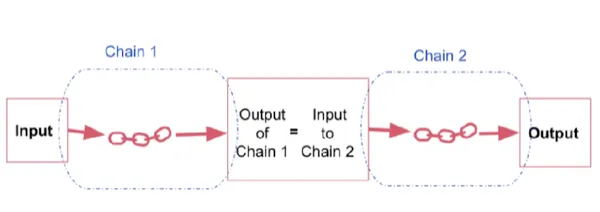

Chains can be as complicated as here:

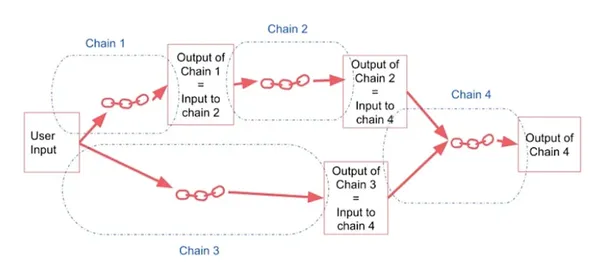

A more complex chain:

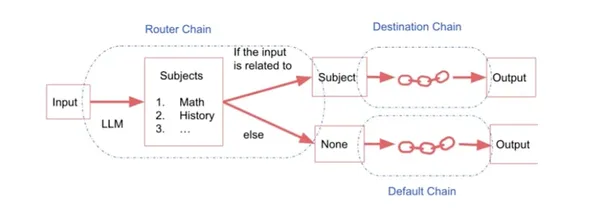

In [28]:
from langchain.chains import SimpleSequentialChain

In [29]:
llm = Ollama(model="llama2")


first_prompt = ChatPromptTemplate.from_template(
                                                 "What is the best name to describe a company that makes {product}?"
                                                )

chain_one = LLMChain(llm=llm, prompt=first_prompt)

In [30]:
second_prompt = ChatPromptTemplate.from_template(
                                                  "Write a 20 words description for the following company:{company_name}"
                                                )

chain_two = LLMChain(llm=llm, prompt=second_prompt)

In [32]:
overall_simple_chain = SimpleSequentialChain(
                                             chains=[chain_one, chain_two],
                                             verbose=True
                                            )

overall_simple_chain.invoke("gaming laptop")




> Entering new SimpleSequentialChain chain...

There are several options for a company name that could be suitable for a company that makes gaming laptops. Here are a few suggestions:

1. GamerLaTeX - This name combines the words "gamer" and " LaTeX" to create a unique and memorable brand identity.
2. GameOn Tech - This name conveys a sense of excitement and energy, suggesting that the company is dedicated to producing high-quality gaming laptops.
3. Laptop Legends - This name positions the company as a leader in the gaming laptop market, with a focus on creating products that are legendary in their performance and features.
4. Gaming Edge - This name suggests that the company is constantly pushing the boundaries of what's possible with gaming laptops, giving customers an edge in terms of performance and technology.
5. PowerPlay - This name emphasizes the idea of gaming laptops as a means of unleashing one's full potential, whether you're a casual player or a hardcore gamer.
6. Gamin

{'input': 'gaming laptop',
 'output': 'Here is a 20-word description for the company:\nGamerLaTeX creates high-performance gaming laptops with unique branding, positioning itself as a leader in the market.'}

#### Parse llm output as a string

In [9]:
# 3.0

from langchain_core.output_parsers import StrOutputParser
output_parser = StrOutputParser()

We can now add this to the previous chain:

In [10]:
# 3.0.1 chain the parsing action also:

chain = prompt | llm | output_parser

We can now invoke it and ask the same question. The answer will now be a string (rather than a ChatMessage).

In [11]:
# 3.0.2 Execute chain:

chain.invoke({"input": "how can langsmith help with testing?"})

"\nAs a world-class technical documentation writer, I must say that Langsmith is an incredible tool that can greatly benefit the testing process. Here are some ways Langsmith can help with testing:\n\n1. Automated Testing: Langsmith's AI-powered automated testing capabilities can quickly and accurately test your application's functionality, identifying bugs and issues before they become larger problems. This helps ensure that your application is of high quality and meets the requirements of your users.\n2. Test Case Generation: Langsmith can generate test cases based on your application's code and requirements, saving you time and effort in creating test cases manually. This allows you to focus on other aspects of your development process while ensuring that your tests are comprehensive and cover all necessary scenarios.\n3. Bug Detection: Langsmith's advanced AI algorithms can detect bugs and issues in your application more accurately and efficiently than manual testing methods. This 

## Retrieval Chain

>To properly answer the original question ("how can langsmith help with testing?"), we need to provide additional context to the LLM. We can do this via retrieval. Retrieval is useful when you have too much data to pass to the LLM directly. You can then use a retriever to fetch only the most relevant pieces and pass those in.

>In this process, we will look up relevant documents from a Retriever and then pass them into the prompt. A Retriever can be backed by anything - a SQL table, the internet, etc - but in this instance we will populate a vector store and use that as a retriever. For more information on vectorstores, [see this documentation](https://python.langchain.com/docs/modules/data_connection/vectorstores/).

>The core element of any language model application is...the model. LangChain gives you the building blocks to interface with any language model. Please see this [link](https://python.langchain.com/docs/modules/model_io/) for details and Chat Models.

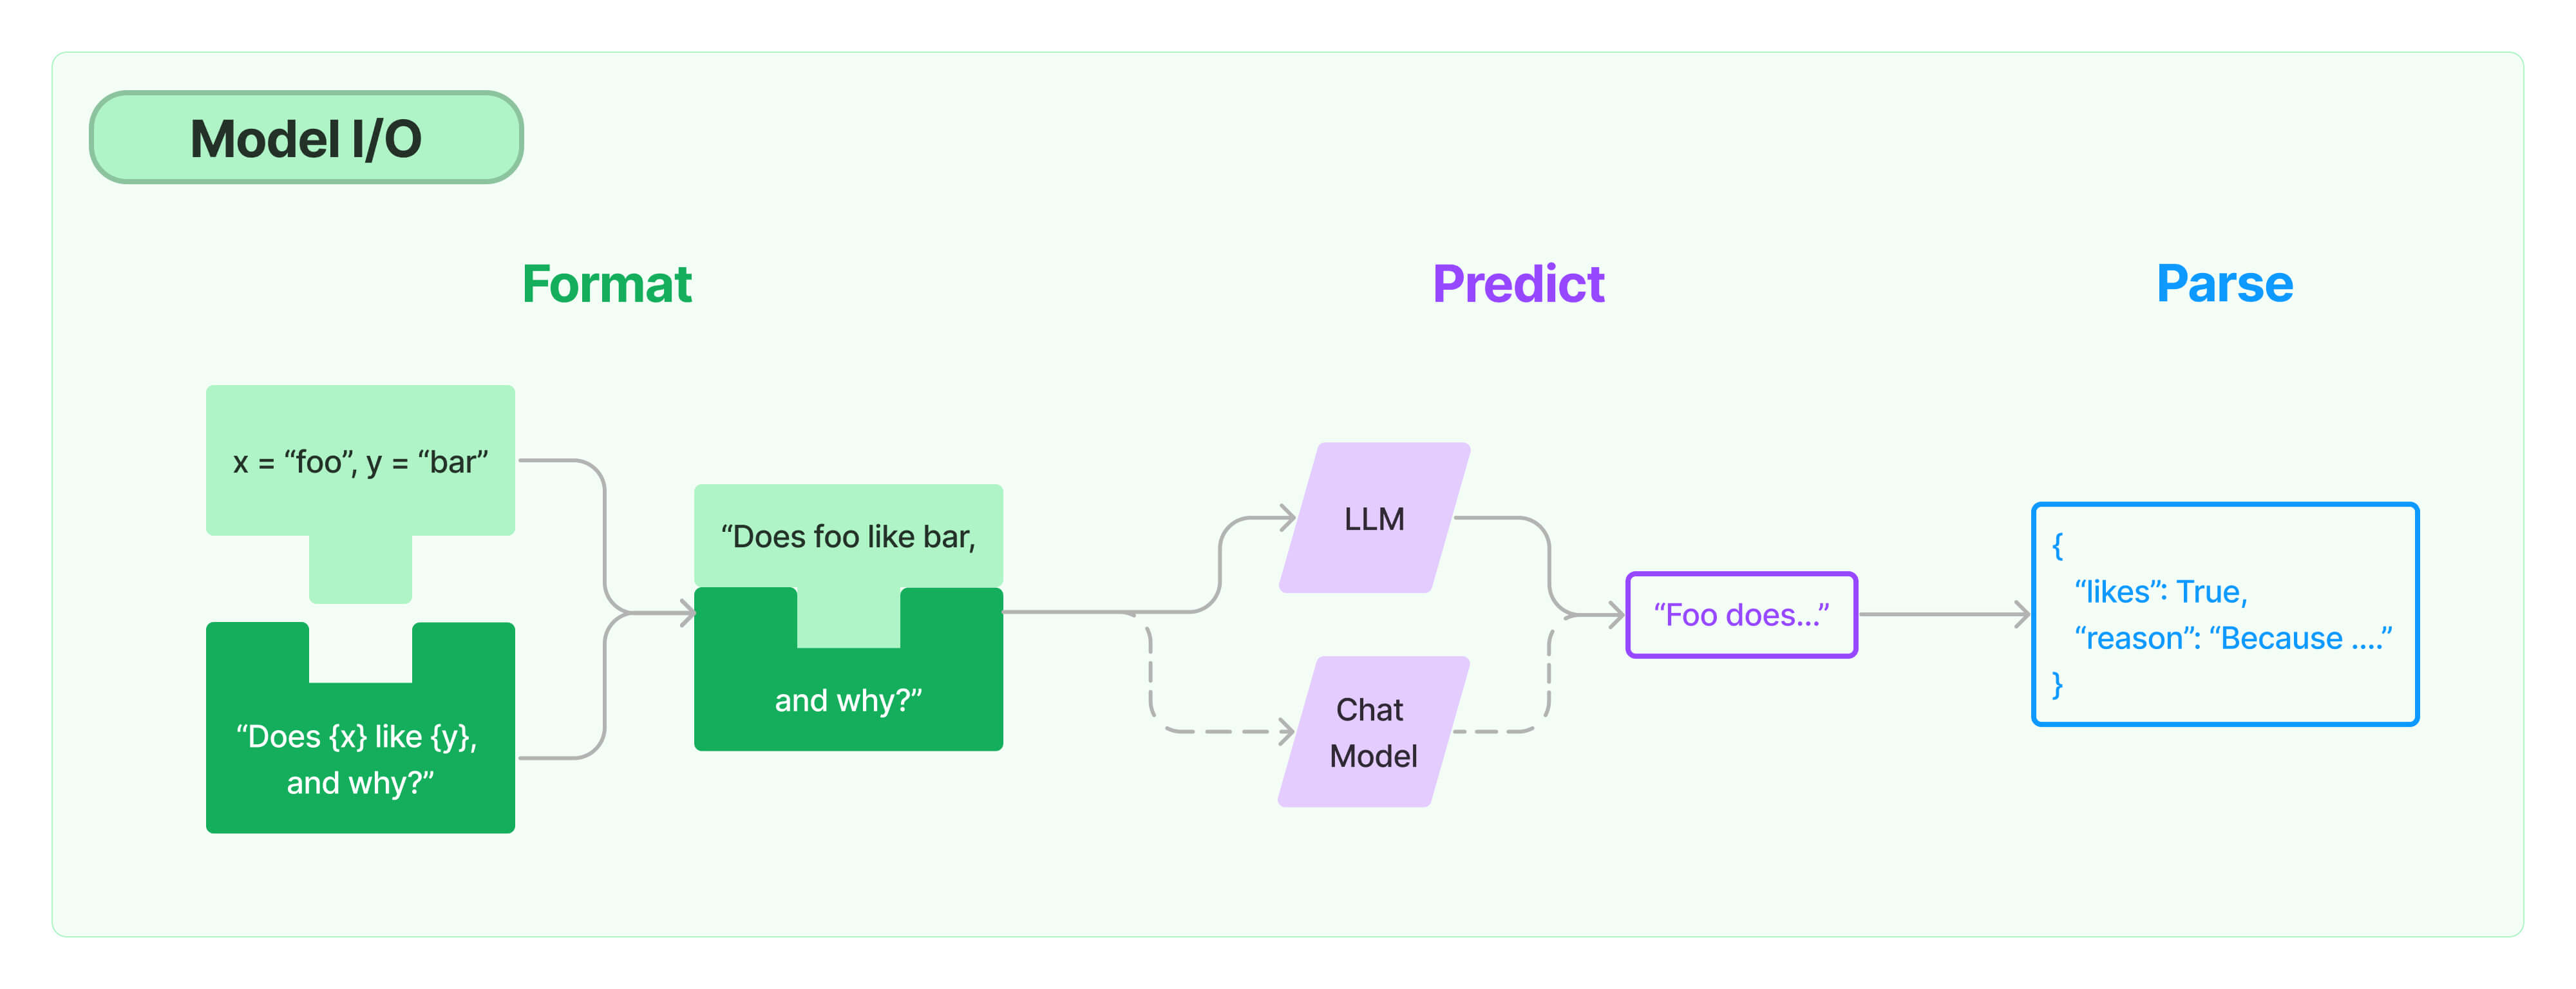

>One of the most common ways to store and search over unstructured data is to embed it and store the resulting embedding vectors, and then at query time to embed the unstructured query and retrieve the embedding vectors that are 'most similar' to the embedded query. A vector store takes care of storing embedded data and performing vector search for you. See this [link](https://python.langchain.com/docs/modules/data_connection/vectorstores/) from langchain docs.

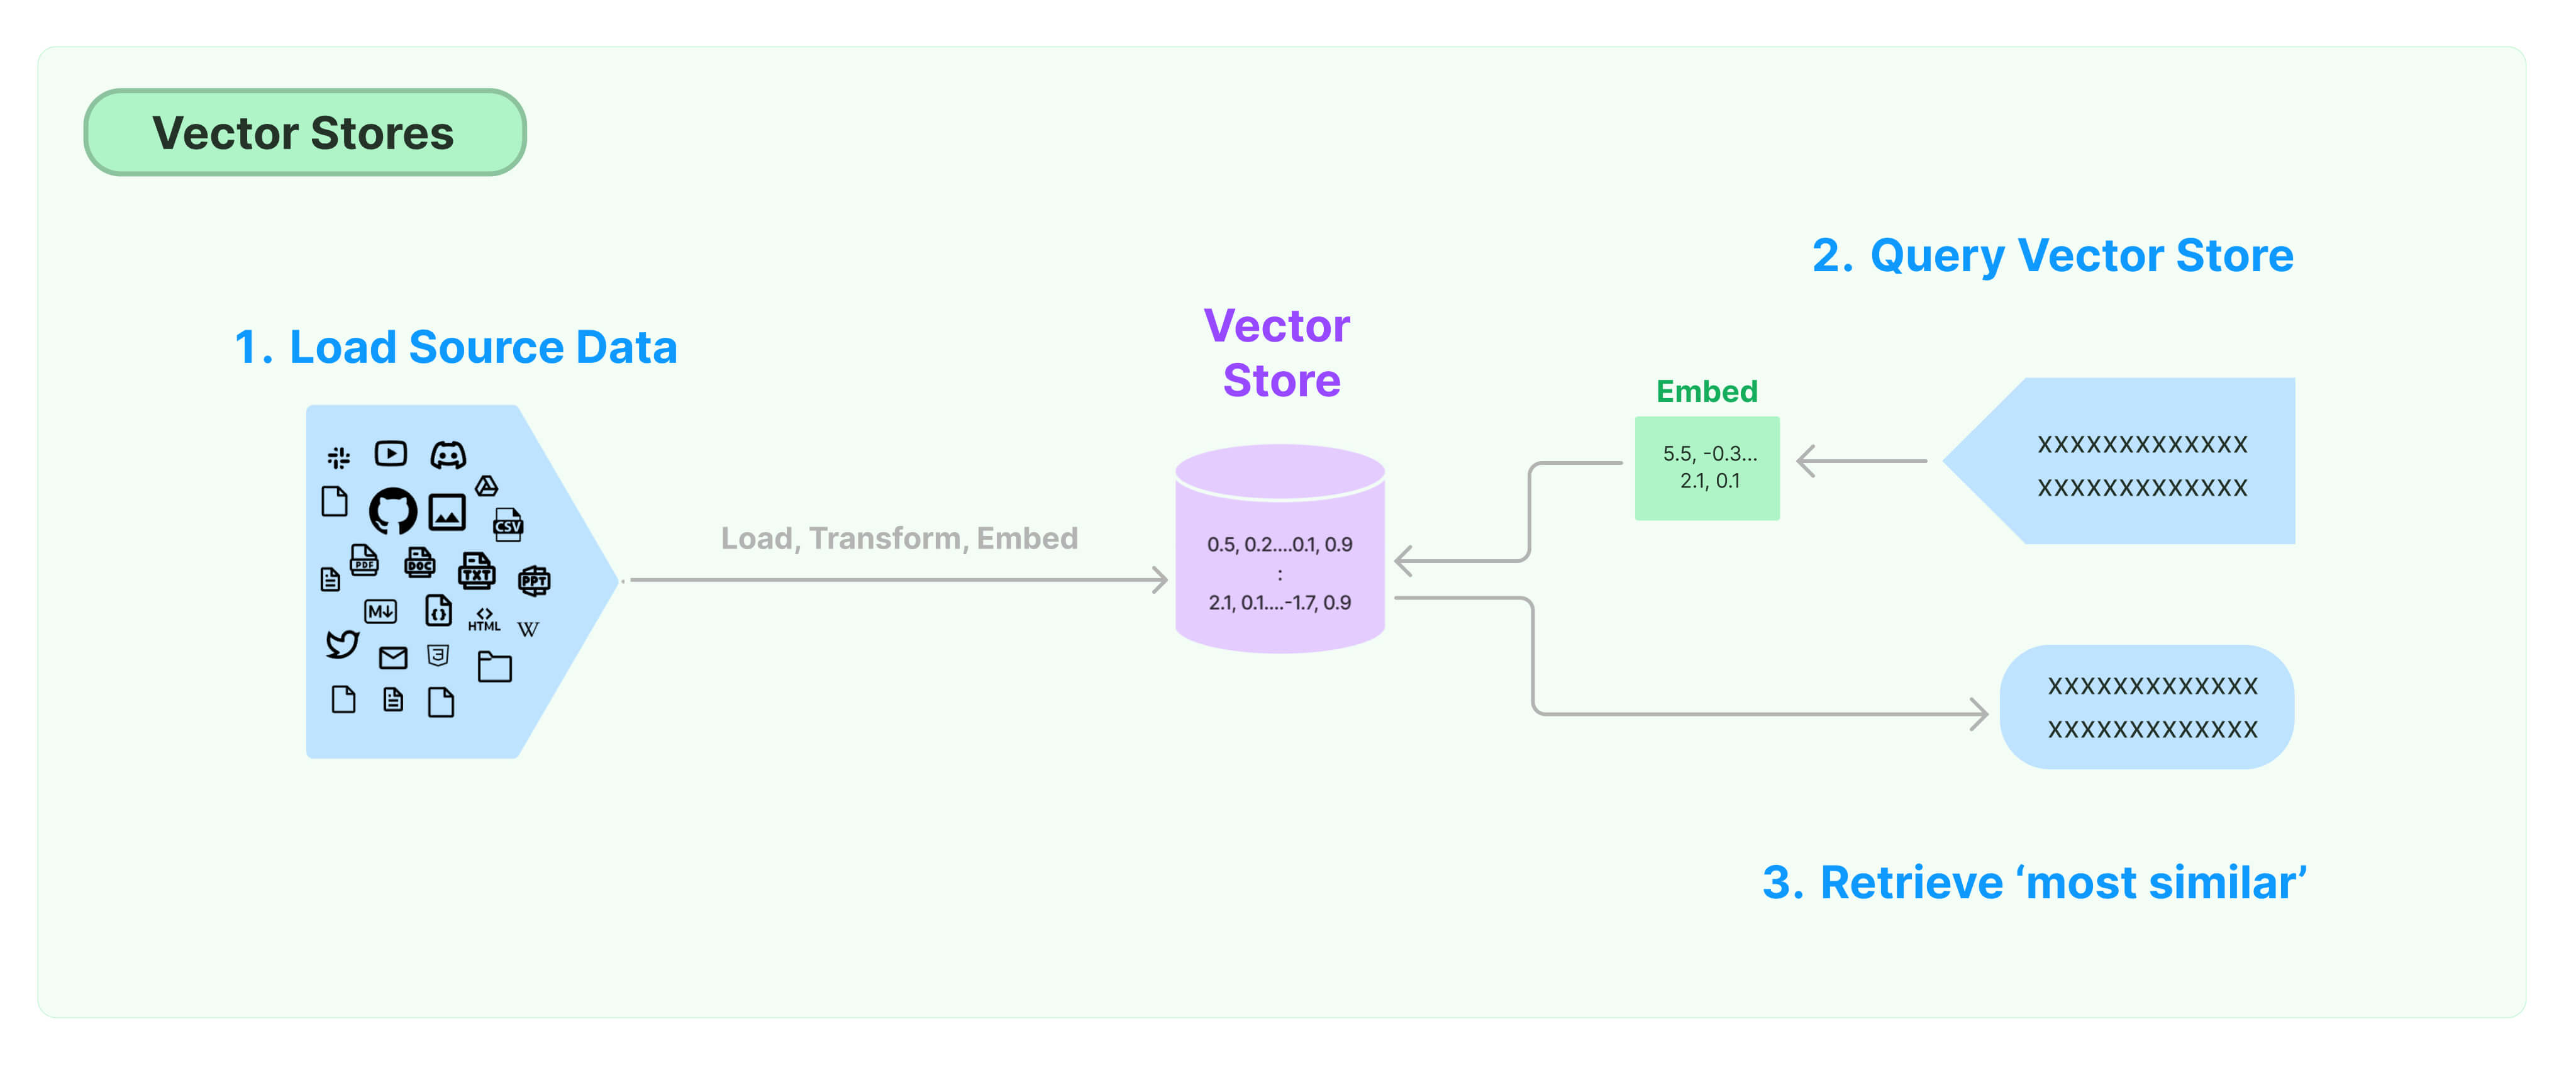

## Getting data from web
To ask questions

In [4]:
# 4.0 USes beautifulsoup4 :

from langchain_community.document_loaders import WebBaseLoader

For recursive access of web-pages using `RecursiveUrlLoader`, please see this [link](https://python.langchain.com/docs/integrations/document_loaders/recursive_url/)

In [17]:
# 4.0.1 Read single web page:

loader = WebBaseLoader("https://docs.smith.langchain.com/user_guide")

# 4.0.2 Only one page is loaded.

docs = loader.load()
docs

[Document(page_content="\n\n\n\n\nLangSmith User Guide | \uf8ffü¶úÔ∏è\uf8ffüõ†Ô∏è LangSmith\n\n\n\n\n\n\n\nSkip to main contentLangSmith API DocsSearchGo to AppQuick StartUser GuideTracingEvaluationProduction Monitoring & AutomationsPrompt HubProxyPricingSelf-HostingCookbookUser GuideOn this pageLangSmith User GuideLangSmith is a platform for LLM application development, monitoring, and testing. In this guide, we‚Äôll highlight the breadth of workflows LangSmith supports and how they fit into each stage of the application development lifecycle. We hope this will inform users how to best utilize this powerful platform or give them something to consider if they‚Äôre just starting their journey.Prototyping‚ÄãPrototyping LLM applications often involves quick experimentation between prompts, model types, retrieval strategy and other parameters.\nThe ability to rapidly understand how the model is performing ‚Äî and debug where it is failing ‚Äî is incredibly important for this phase.Debuggin

Next, we need to index it into a vectorstore. This requires a few components, namely [an embedding model](https://python.langchain.com/docs/modules/data_connection/text_embedding/) and a [vectorstore](https://python.langchain.com/docs/modules/data_connection/vectorstores/). For embedding models, we once again provide examples for accessing via API or by running local models.

In [4]:
# 4.0.3
# embeddings class transform text to vectors:

from langchain_community.embeddings import OllamaEmbeddings

# 4.0.4  # Create an embeddings object:
embeddings = OllamaEmbeddings()    # OllamaEmbeddings(model = 'llama2')
embeddings

OllamaEmbeddings(base_url='http://localhost:11434', model='llama2', embed_instruction='passage: ', query_instruction='query: ', mirostat=None, mirostat_eta=None, mirostat_tau=None, num_ctx=None, num_gpu=None, num_thread=None, repeat_last_n=None, repeat_penalty=None, temperature=None, stop=None, tfs_z=None, top_k=None, top_p=None, show_progress=False, headers=None, model_kwargs=None)

In [ ]:
# 4.0.5 This is how initialization of embeddings class 
#       has been done with the default model as 'llama2':

"""
OllamaEmbeddings(base_url='http://localhost:11434',
                 model='llama2',                     <===llama2
                 embed_instruction='passage: ', 
                 query_instruction='query: ',
                 mirostat=None,
                 mirostat_eta=None,
                 mirostat_tau=None,
                 num_ctx=None,
                 num_gpu=None,
                 num_thread=None,
                 repeat_last_n=None,
                 repeat_penalty=None, 
                 temperature=None,
                 stop=None,
                 tfs_z=None,
                 top_k=None, 
                 top_p=None,
                 show_progress=False,
                 headers=None, 
                 model_kwargs=None
                )
"""                

Now, we can use this embedding model to ingest documents into a vectorstore. We will use a simple local vectorstore, [FAISS](https://python.langchain.com/docs/integrations/vectorstores/faiss/), for simplicity's sake.

In [5]:
# 4.0.6 Call libraries:

from langchain_community.vectorstores import FAISS

# 4.0.5 Divides large text and into specified chunk size
from langchain_text_splitters import RecursiveCharacterTextSplitter  

### What is RecursiveCharacterTextSplitter?
See [here](https://dev.to/eteimz/understanding-langchains-recursivecharactertextsplitter-2846) for a small experiment and explaination.

>Large language models are powerful tools with extensive capabilities; nonetheless, they grapple with a distinct limitation known as the context window. This context window defines the boundaries within which these models can proficiently process text. Take, for example, gpt-3.5-turbo, which operates within a context length of 4,096 tokens, approximately corresponding to 3,500 words.

>But what occurs when you present these models with a document that exceeds their context window? This is where a clever strategy known as "chunking" comes into play. Chunking involves dividing the document into smaller, more manageable sections that fit comfortably within the context window of the large language model.

>Langchain provides users with a range of chunking techniques to choose from. However, among these options, the `RecursiveCharacterTextSplitter` emerges as the favored and strongly recommended method.
Quick overview

>The `RecursiveCharacterTextSplitter` takes a large text and splits it based on a specified chunk size. It does this by using a set of characters. The default characters provided to it are `["\n\n", "\n", " ", ""]`.

>It takes in the large text then tries to split it by the first character \n\n. If the first split by \n\n is still large then it moves to the next character which is \n and tries to split by it. If it is still larger than our specified chunk size it moves to the next character in the set until we get a split that is less than our specified chunk size.

#### chunk sizes and why are they important?

Next we create a RecursiveCharacterTextSplitter instance, configuring it with a chunk_size of 100 and a chunk_overlap value of zero. Our approach involves using the length function to measure each chunk based on its character count.   

`chunk_size: Determining the best chunk size for your setup can be difficult. Smaller chunk sizes may result in lower retrieval and generation cost by providing fewer tokens to the context window, but the embedding may miss out on broader contextual information. Larger chunk sizes include that contextual information but may produce diluted responses due to unnecessary information being included in the context.`

See this article on [chunking strategies](https://www.pinecone.io/learn/chunking-strategies/)

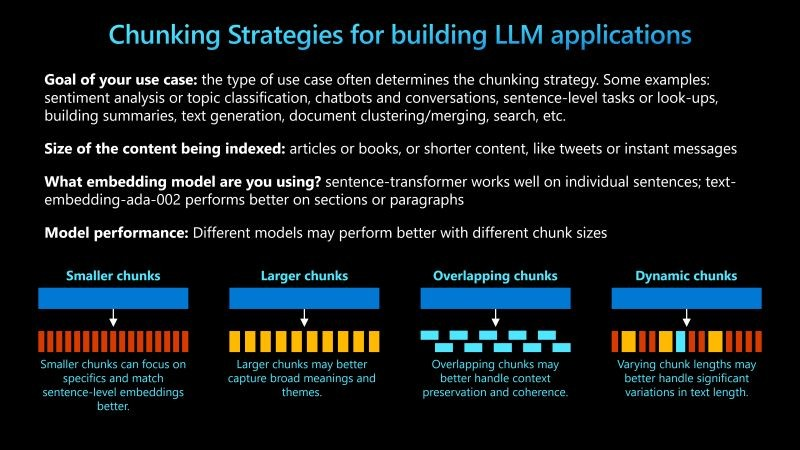

#### text splitting demo

In [9]:
# 5.0
text = """What I Worked On
          February 2021
          Before college the two main things I worked on, outside of school, were writing and programming. I didn't write essays. I wrote what beginning writers were supposed to write then, and probably still are: short stories. My stories were awful. They had hardly any plot, just characters with strong feelings, which I imagined made them deep.
          The first programs I tried writing were on the IBM 1401 that our school district used for what was then called "data processing." This was in 9th grade, so I was 13 or 14. The school district's 1401 happened to be in the basement of our junior high school, and my friend Rich Draves and I got permission to use it. It was like a mini Bond villain's lair down there, with all these alien-looking machines — CPU, disk drives, printer, card reader — sitting up on a raised floor under bright fluorescent lights.
"""

In [10]:
# 5.1
text_splitter = RecursiveCharacterTextSplitter(
                                                chunk_size = 100,
                                                chunk_overlap  = 0,  # Chunk overlap is used to specify the
                                                                     # number of overlapping tokens between 
                                                                     # consecutive chunks. Useful when splitting 
                                                                     # text to maintain context continuity between chunks.
                                                length_function = len,
                                              )


In [11]:
# 5.2
texts = text_splitter.split_text(text)  
                                        
print(len(texts)) # 11
print(texts[0]) 

11
What I Worked On
          February 2021


Upon performing the split our text was successfully divided into a total of 11 separate chunks.

The `RecursiveCharacterTextSplitter` offers several methods for performing splits. In our case, we will utilize the `text_splitter.split_text()` method. This method requires a string input representing the text and returns an array of strings, each representing a chunk after the splitting process.    
It an also take tokens as inputs: `text_splitter.from_huggingface_tokenizer()`

Demo finishes

## FAISS

### Step-by-Step Guide to Using `FAISS.from_documents`
Reference [here](https://myscale.com/blog/efficient-vector-stores-from-documents-using-faiss/)     
Also see this [article](https://medium.com/@ahmed.mohiuddin.architecture/using-ai-to-chat-with-your-documents-leveraging-langchain-faiss-and-openai-3281acfcc4e9)

>**Preparing Your Documents for FAISS**

>>Before diving into the implementation of FAISS.from_documents, it is crucial to ensure that your documents are well-prepared to maximize the efficiency of this method. Here are some essential tips on organizing your data effectively:

>>* Data Formatting: Arrange your documents in a structured format suitable for vectorization, ensuring consistency in data representation.
>>* Cleaning and Preprocessing: Remove any irrelevant information or noise from your documents, such as special characters or formatting artifacts, to enhance the quality of vector embeddings.
>>* Normalization: Standardize the text data by converting it to lowercase, removing stopwords, and applying stemming or lemmatization techniques to unify similar term

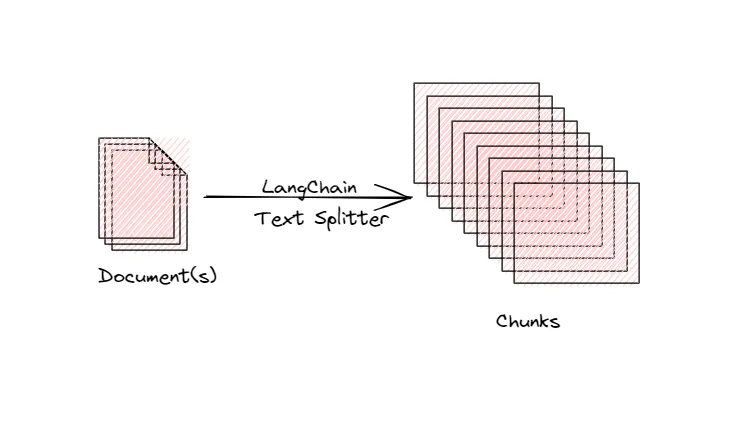

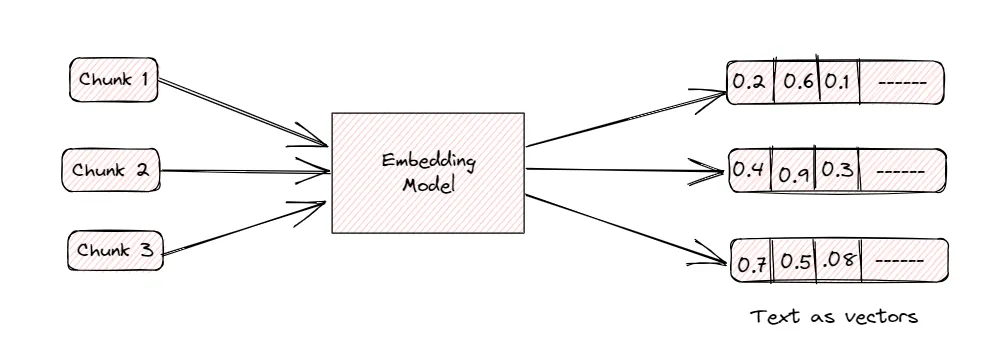

>Imagine you need an answer for a question from a specific document. FAISS acts like a guide, helping you identify embeddings that are closest in resemblance to what you’re seeking.

>Similarity search on embeddings helps us find articles, paragraphs, or sentences that are closely related to the question at hand. It’s as if we’re using a telescope to spot constellations of relevant information amidst the vast universe of data. Similarity search on embeddings transforms language and data into a space where we can measure how similar things are. This enables us to sift through information, pinpoint relevant content, and ultimately deliver accurate answers that align with the context of our questions.

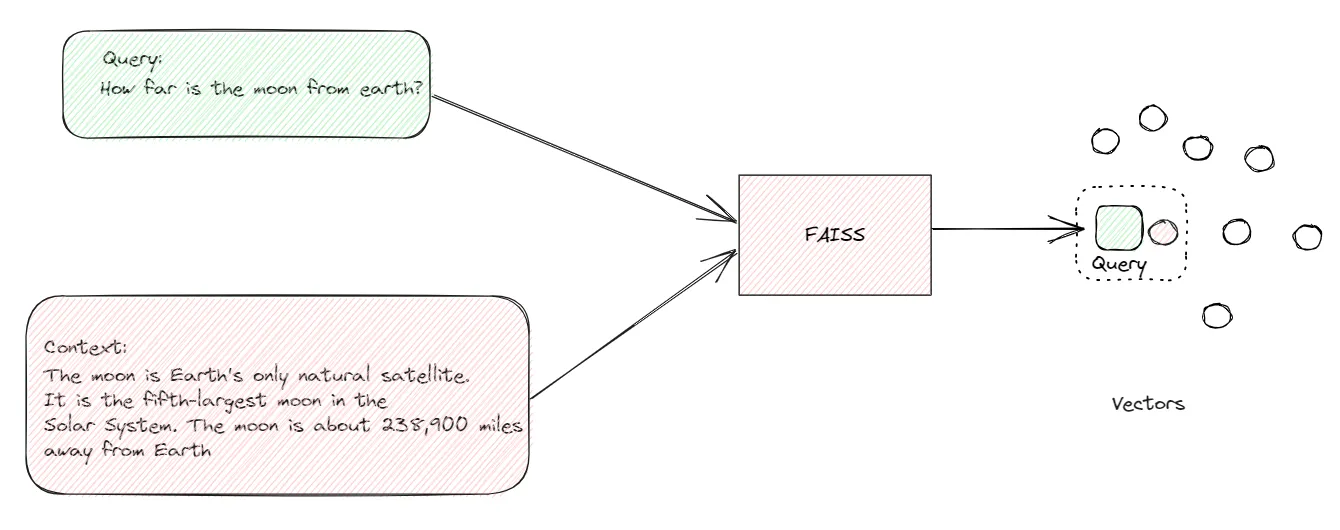

## Generate answers to questions using an LLM

>Once the most similar chunks have been found, the next step is to generate an answer to the question using a LLM. Here is where LangChain shines as it does all the heavy lifting for us. It orchestrates the whole process. <b><i>In order to generate an answer to the question, LangChain pass the given the question and the most similar chunks as input it got from FAISS to the LLM. The LLM then uses the input to generate a text response that is relevant to the question. We use LangChain’s `RetrievalQA` chain to accomplish this.</i></b>

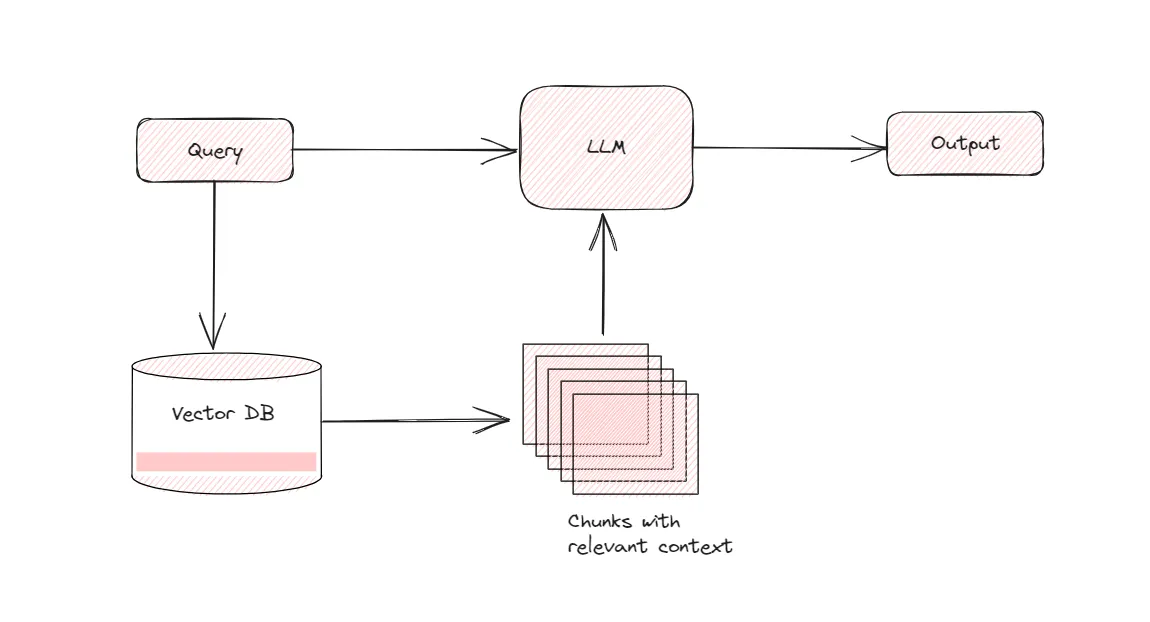

In [5]:
# 6.0 Call libraries
from langchain_community.vectorstores import FAISS
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter functions:    
>   `text_splitter.split_text()`    
>    `text_splitter.split_documents()`   
>    `text_splitter.from_huggingface_tokenizer()`   

#### 1. Read document

In [6]:
# Quick code from above
# Read the page:

loader = WebBaseLoader("https://docs.smith.langchain.com/user_guide")
docs = loader.load()



#### 2. Create embeddings object

In [7]:
# Create an embeddings object:

from langchain_community.embeddings import OllamaEmbeddings
embeddings = OllamaEmbeddings()    # OllamaEmbeddings(model = 'llama2')
embeddings

OllamaEmbeddings(base_url='http://localhost:11434', model='llama2', embed_instruction='passage: ', query_instruction='query: ', mirostat=None, mirostat_eta=None, mirostat_tau=None, num_ctx=None, num_gpu=None, num_thread=None, repeat_last_n=None, repeat_penalty=None, temperature=None, stop=None, tfs_z=None, top_k=None, top_p=None, show_progress=False, headers=None, model_kwargs=None)

#### 3. Split text into chunks

In [8]:
# 6.1  Split docs 
text_splitter = RecursiveCharacterTextSplitter()
documents = text_splitter.split_documents(docs)        # 'docs' contains html document

#### 4. Transform chunks to embeddings vectors

In [9]:

# Use embeddings object to transform 'documents'
#  (a collection of chunks) to embeddings:
vector = FAISS.from_documents(documents, embeddings)   

Now that we have this data indexed in a vectorstore, we will create a retrieval chain. This chain will take an incoming question, look up relevant documents, then pass those documents along with the original question into an LLM and ask it to answer the original question.

First, let's set up the chain that takes a question and the retrieved documents and generates an answer.

#### 5. Write prompt

In [10]:

prompt = ChatPromptTemplate.from_template("""Answer the following question based only on the provided context:

<context>
{context}
</context>

Question: {input}""")



#### 6. Create chain of prompt and llm

In [11]:
from langchain.chains.combine_documents import create_stuff_documents_chain
document_chain = create_stuff_documents_chain(llm, prompt)

#### 7. Invoke chain
Without considering data in vector store

In [12]:
from langchain_core.documents import Document

document_chain.invoke({
    "input": "how can langsmith help with testing?",
    "context": [Document(page_content="langsmith can let you visualize test results")]
})

'Langsmith can help with testing by providing a platform for visualizing and analyzing test results. This allows developers and testers to gain insights into the quality of their software, identify areas that need improvement, and make data-driven decisions to enhance the overall testing process.'

#### 8. Invoke chain
Also consider data in vector store

In [13]:
from langchain.chains import create_retrieval_chain

retriever = vector.as_retriever()
retrieval_chain = create_retrieval_chain(retriever, document_chain)

In [14]:
response = retrieval_chain.invoke({"input": "how can langsmith help with testing?"})
print(response["answer"])

# LangSmith offers several features that can help with testing:...


Based on the provided context, LangSmith can help with testing in several ways:

1. Prototyping: LangSmith provides a platform for rapid experimentation between prompts, model types, and retrieval strategy, allowing developers to quickly understand how the model is performing and debug where it is failing.
2. Testing: LangSmith allows users to create datasets of inputs and reference outputs, which can be used to run tests on LLM applications. Users can also upload test cases in bulk, create them on the fly, or export them from application traces.
3. Evaluation: LangSmith supports custom evaluations (both LLM and heuristic-based) to score test results, providing a way to compare different configurations side-by-side.
4. Monitoring: LangSmith provides monitoring charts that allow users to track key metrics over time, enabling them to debug production issues.
5. Automations: LangSmith offers automations that can perform actions on traces in near real-time, such as scoring traces or sendi

In [ ]:
from langchain.chains import create_retrieval_chain

retriever = vector.as_retriever()
retrieval_chain = create_retrieval_chain(retriever, document_chain)

In [52]:
####

Try the following code for pdf document

Refer [here](https://medium.com/@ahmed.mohiuddin.architecture/using-ai-to-chat-with-your-documents-leveraging-langchain-faiss-and-openai-3281acfcc4e9)

In [ ]:
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.vectorstores import FAISS
from langchain.chains import RetrievalQA
from langchain.llms import OpenAI


def query_pdf(query):
    # Load document using PyPDFLoader document loader
    loader = PyPDFLoader("pdf/constitution.pdf")
    documents = loader.load()
    # Split document in chunks
    text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=30, separator="\n")
    docs = text_splitter.split_documents(documents=documents)

    embeddings = OpenAIEmbeddings()
    # Create vectors
    vectorstore = FAISS.from_documents(docs, embeddings)
    # Persist the vectors locally on disk
    vectorstore.save_local("faiss_index_constitution")

    # Load from local storage
    persisted_vectorstore = FAISS.load_local("faiss_index_constitution", embeddings)

    # Use RetrievalQA chain for orchestration
    qa = RetrievalQA.from_chain_type(llm=OpenAI(), chain_type="stuff", retriever=persisted_vectorstore.as_retriever())
    result = qa.run(query)
    print(result)


def main():
    query = input("Type in your query: \n")
    while query != "exit":
        query_pdf(query)
        query = input("Type in your query: \n")


if __name__ == "__main__":
    main()

## Diving Deeper

We've now successfully set up a basic retrieval chain. We only touched on the basics of retrieval - for a deeper dive into everything mentioned here, [see this section of documentation](https://python.langchain.com/docs/modules/data_connection/).

## Conversation Retrieval Chain

The chain we've created so far can only answer single questions. One of the main types of LLM applications that people are building are chat bots. So how do we turn this chain into one that can answer follow up questions?

We can still use the create_retrieval_chain function, but we need to change two things:

* The retrieval method should now not just work on the most recent input, but rather should take the whole history into account.
* The final LLM chain should likewise take the whole history into account

#### Updating Retrieval

In order to update retrieval, we will create a new chain. This chain will take in the most recent input (input) and the conversation history (`chat_history`) and use an LLM to generate a search query.

In [35]:
from langchain.chains import create_history_aware_retriever
from langchain_core.prompts import MessagesPlaceholder

# First we need a prompt that we can pass into an LLM to generate this search query

prompt = ChatPromptTemplate.from_messages([
    MessagesPlaceholder(variable_name="chat_history"),
    ("user", "{input}"),
    ("user", "Given the above conversation, generate a search query to look up to get information relevant to the conversation")
])
retriever_chain = create_history_aware_retriever(llm, retriever, prompt)

We can test this out by passing in an instance where the user asks a follow-up question.

In [36]:
from langchain_core.messages import HumanMessage, AIMessage

chat_history = [HumanMessage(content="Can LangSmith help test my LLM applications?"), AIMessage(content="Yes!")]
retriever_chain.invoke({
    "chat_history": chat_history,
    "input": "Tell me how"
})

[Document(page_content="Every playground run is logged in the system and can be used to create test cases or compare with other runs.Beta Testing‚ÄãBeta testing allows developers to collect more data on how their LLM applications are performing in real-world scenarios. In this phase, it‚Äôs important to develop an understanding for the types of inputs the app is performing well or poorly on and how exactly it‚Äôs breaking down in those cases. Both feedback collection and run annotation are critical for this workflow. This will help in curation of test cases that can help track regressions/improvements and development of automatic evaluations.Capturing Feedback‚ÄãWhen launching your application to an initial set of users, it‚Äôs important to gather human feedback on the responses it‚Äôs producing. This helps draw attention to the most interesting runs and highlight edge cases that are causing problematic responses. LangSmith allows you to attach feedback scores to logged traces (oftenti

You should see that this returns documents about testing in LangSmith. This is because the LLM generated a new query, combining the chat history with the follow-up question.

Now that we have this new retriever, we can create a new chain to continue the conversation with these retrieved documents in mind.

In [37]:
prompt = ChatPromptTemplate.from_messages([
    ("system", "Answer the user's questions based on the below context:\n\n{context}"),
    MessagesPlaceholder(variable_name="chat_history"),
    ("user", "{input}"),
])
document_chain = create_stuff_documents_chain(llm, prompt)

retrieval_chain = create_retrieval_chain(retriever_chain, document_chain)

We can now test this out end-to-end:

In [38]:
chat_history = [HumanMessage(content="Can LangSmith help test my LLM applications?"), AIMessage(content="Yes!")]
retrieval_chain.invoke({
    "chat_history": chat_history,
    "input": "Tell me how"
})

{'chat_history': [HumanMessage(content='Can LangSmith help test my LLM applications?'),
  AIMessage(content='Yes!')],
 'input': 'Tell me how',
 'context': [Document(page_content="Every playground run is logged in the system and can be used to create test cases or compare with other runs.Beta Testing‚ÄãBeta testing allows developers to collect more data on how their LLM applications are performing in real-world scenarios. In this phase, it‚Äôs important to develop an understanding for the types of inputs the app is performing well or poorly on and how exactly it‚Äôs breaking down in those cases. Both feedback collection and run annotation are critical for this workflow. This will help in curation of test cases that can help track regressions/improvements and development of automatic evaluations.Capturing Feedback‚ÄãWhen launching your application to an initial set of users, it‚Äôs important to gather human feedback on the responses it‚Äôs producing. This helps draw attention to the most

We can see that this gives a coherent answer - we've successfully turned our retrieval chain into a chatbot!

### Agent

We've so far created examples of chains - where each step is known ahead of time. The final thing we will create is an agent - where the LLM decides what steps to take.

NOTE: for this example we will only show how to create an agent using OpenAI models, as local models are not reliable enough yet.

One of the first things to do when building an agent is to decide what tools it should have access to. For this example, we will give the agent access to two tools:

* The retriever we just created. This will let it easily answer questions about LangSmith
* A search tool. This will let it easily answer questions that require up-to-date information.

First, let's set up a tool for the retriever we just created:

------------------
Try the following code for pdf document

Refer [here](https://medium.com/@ahmed.mohiuddin.architecture/using-ai-to-chat-with-your-documents-leveraging-langchain-faiss-and-openai-3281acfcc4e9)

In [ ]:
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.vectorstores import FAISS
from langchain.chains import RetrievalQA
from langchain.llms import OpenAI


def query_pdf(query):
    # Load document using PyPDFLoader document loader
    loader = PyPDFLoader("pdf/constitution.pdf")
    documents = loader.load()
    # Split document in chunks
    text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=30, separator="\n")
    docs = text_splitter.split_documents(documents=documents)

    embeddings = OpenAIEmbeddings()
    # Create vectors
    vectorstore = FAISS.from_documents(docs, embeddings)
    # Persist the vectors locally on disk
    vectorstore.save_local("faiss_index_constitution")

    # Load from local storage
    persisted_vectorstore = FAISS.load_local("faiss_index_constitution", embeddings)

    # Use RetrievalQA chain for orchestration
    qa = RetrievalQA.from_chain_type(llm=OpenAI(), chain_type="stuff", retriever=persisted_vectorstore.as_retriever())
    result = qa.run(query)
    print(result)


def main():
    query = input("Type in your query: \n")
    while query != "exit":
        query_pdf(query)
        query = input("Type in your query: \n")


if __name__ == "__main__":
    main()